<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/2-Advance/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from examples.FinRL_StockTrading_Sanity import run_ensemble_with_params
# ## install finrl library
!pip install wrds
!pip install swig
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: apt-get
Obtaining file:///Users/ruxu/Desktop/AA228/Project_3/FinRL
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/4g/ysbz5xb13q91647czp8lcqg4001mtg/T/pip-install-ho0paufy/elegantrl_93fa8608d5ff4295848ae99d67ca0d49
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/4g/ysbz5xb13q91647czp8lcqg4001mtg/T/pip-install-ho0paufy/elegantrl_93fa8608d5ff4295848ae99d67ca0d49
  Resolved https://github.com/AI4Finance-Foundation/Elega

In [20]:
!pip install -e ~/Workspace/AI4Finance/FinRL

Obtaining file:///Users/tonyren/Workspace/AI4Finance/FinRL
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/fk/ghrbpzjd2ljb898y6fvw8sgc0000gn/T/pip-install-_cs85q_3/elegantrl_c46be8593cbb4f32969c8afce9b94eb5
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/fk/ghrbpzjd2ljb898y6fvw8sgc0000gn/T/pip-install-_cs85q_3/elegantrl_c46be8593cbb4f32969c8afce9b94eb5
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit c2939fefe0e3ec55601ded49e39fdf9d7d781ea0
  Preparing metadata (setup.py) ... done
  Building editable for finrl (pyproject.toml) ... done
  Created wheel for finrl: filename=finrl-0.3.6-py3-none-any.whl size=9103 sha256=ebb9a360ce7d0d9eb

<a id='1.3'></a>
## 2.3. Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import CUSTOM_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent,DRLStackingAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from finrl.agents.stablebaselines3.models import hyperparameterized_model_name, MODELS


from pprint import pprint

import sys
import itertools

<a id='1.4'></a>
## 2.4. Create Folders

In [3]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [5]:
# test dummy stock
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import CUSTOM_TICKER
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

# ORIGINAL
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-03-01'




INDICATORS = ['close_-1_s','close_-2_s','close_-3_s','close_-4_s','close_-5_s', 'close_0_s']
CUSTOM_TICKER = [
    "INTC",
    "F",
    "PARA",
    "LVS"
]
def dummy_stock(n, type='flat'):
    if type == 'flat':
        return [10]*n
    if type == 'triangle':
       return ((list(np.arange(100,2000,100)) + list(np.arange(2000,100,-100)))*n)[0:n]
    if type == 'up':
       return list(np.arange(10,20000,(20000-10)/n))[0:n]
    if type == 'down':
       return list(np.arange(20000,10,(10-20000)/n))[0:n]

if True:
    df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = CUSTOM_TICKER).fetch_data()

    #df['close'] = dummy_stock(df.shape[0], type='triangle')
    #df['open'] = dummy_stock(df.shape[0], type='triangle')
    #df['low'] = dummy_stock(df.shape[0], type='triangle')
    #df['high'] = dummy_stock(df.shape[0], type='triangle')
    fe = FeatureEngineer(use_technical_indicator=True,
                         tech_indicator_list = INDICATORS,
                         use_turbulence=True,
                         user_defined_feature = False)

    processed = fe.preprocess_data(df)
    processed = processed.copy()
    processed = processed.fillna(0)
    processed = processed.replace(np.inf,0)
    processed['close_-1_s'] = 100*(processed['close']-processed['close_-1_s'])/processed['close_-1_s']
    processed['close_-2_s'] = 100*(processed['close']-processed['close_-2_s'])/processed['close_-2_s']
    processed['close_-3_s'] = 100*(processed['close']-processed['close_-3_s'])/processed['close_-3_s']
    processed['close_-4_s'] = 100*(processed['close']-processed['close_-4_s'])/processed['close_-4_s']
    processed['close_-5_s'] = 100*(processed['close']-processed['close_-5_s'])/processed['close_-5_s']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Shape of DataFrame:  (13244, 8)
Successfully added technical indicators
Successfully added turbulence index


In [6]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 4, State Space: 33


In [7]:
import random
import copy
def generate_hyperparams_list_from_code(num_variations=5, duplication=4):
    hyperparams_list = []

    # PPO Variations
    PPO_variations = {
        'learning_rate': [1e-5, 1e-4, 1e-3],
        'n_steps': [256, 512, 1024, 2048],
        'batch_size': [64, 128],
        'gamma': [0.98, 0.99],
        'ent_coef': [1e-5, 1e-3],
        'clip_range': [0.2, 0.3],
        'gae_lambda': [0.95, 0.98]
    }

    # A2C Variations
    A2C_variations = {
        'learning_rate': [1e-5, 1e-4, 1e-3, 0.0007],
        'n_steps': [5, 10, 20],
        'gamma': [0.98, 0.99],
        'ent_coef': [1e-5, 1e-3, 0.005],
        'normalize_advantage': [True, False],
        'use_rms_prop': [True, False]
    }

    # DDPG Variations
    DDPG_variations = {
        'learning_rate': [1e-4, 1e-3],
        'batch_size': [64, 128],
        'buffer_size': [int(1e5), int(1e6)],
        'tau': [0.005, 0.01],
        'gamma': [0.98, 0.99],
        'train_freq': [1, 10],
        'action_noise': ['normal', 'ornstein_uhlenbeck']
    }

    # SAC Variations
    SAC_variations = {
        'learning_rate': [1e-4, 1e-3],
        'batch_size': [64, 128],
        'buffer_size': [int(1e5), int(1e6)],
        'tau': [0.005, 0.01],
        'gamma': [0.98, 0.99],
        'train_freq': [1, 10],
        'ent_coef': ['auto'],
    }

    # TD3 Variations
    TD3_variations = {
        'learning_rate': [1e-4, 1e-3],
        'batch_size': [64, 128],
        'buffer_size': [int(1e5), int(1e6)],
        'tau': [0.005, 0.01],
        'gamma': [0.98, 0.99],
        'train_freq': [1, 10],
        'action_noise': ['normal', 'ornstein_uhlenbeck']
    }

    # Timesteps Variations
    timesteps_variations = {
        'a2c': [30000],
        'ppo': [30000],
        'ddpg': [30000],
        'sac': [30000],
        'td3': [30000]
    }

    hyperparams_list = []
    for i in range(num_variations):
        A2C_kwargs = {k: random.choice(v) for k, v in A2C_variations.items()}
        PPO_kwargs = {k: random.choice(v) for k, v in PPO_variations.items()}
        DDPG_kwargs = {k: random.choice(v) for k, v in DDPG_variations.items()}
        SAC_kwargs = {k: random.choice(v) for k, v in SAC_variations.items()}
        TD3_kwargs = {k: random.choice(v) for k, v in TD3_variations.items()}
        timesteps_dict = {k: random.choice(v) for k, v in timesteps_variations.items()}


        if True:
            A2C_kwargs = {'learning_rate': 0.0007, 'n_steps': 10, 'gamma': 0.98, 'ent_coef': 0.005, 'normalize_advantage': False, 'use_rms_prop': False, 'name': 'variant_8'}
            DDPG_kwargs = {'learning_rate': 0.0001, 'batch_size': 128, 'buffer_size': 1000000, 'tau': 0.005, 'gamma': 0.99, 'train_freq': 10, 'action_noise': 'normal', 'name': 'variant_10'}
            TD3_kwargs = {'learning_rate': 0.001, 'batch_size': 128, 'buffer_size': 1000000, 'tau': 0.005, 'gamma': 0.98, 'train_freq': 10, 'action_noise': 'normal', 'name': 'variant_7'}
            SAC_kwargs = {'learning_rate': 0.001, 'batch_size': 128, 'buffer_size': 100000, 'tau': 0.01, 'gamma': 0.98, 'train_freq': 1, 'ent_coef': 'auto', 'name': 'variant_7'}
            PPO_kwargs = {'learning_rate': 0.001, 'n_steps': 1024, 'batch_size': 64, 'gamma': 0.99, 'ent_coef': 0.001, 'clip_range': 0.3, 'gae_lambda': 0.98, 'name': 'variant_1'}


        # Assign a unique name to each set
        for j in range(duplication):
            name = f"variant:{j+1}"
            print(name)

            A2C_kwargs['name'] = name
            PPO_kwargs['name'] = name
            DDPG_kwargs['name'] = name
            SAC_kwargs['name'] = name
            TD3_kwargs['name'] = name

            hyperparam = {
                'A2C_model_kwargs': A2C_kwargs,
                'PPO_model_kwargs': PPO_kwargs,
                'DDPG_model_kwargs': DDPG_kwargs,
                'SAC_model_kwargs': SAC_kwargs,
                'TD3_model_kwargs': TD3_kwargs,
                'timesteps_dict': timesteps_dict
            }

            hyperparams_list.append(copy.deepcopy(hyperparam))

    return hyperparams_list

In [8]:
hyperparams_list = generate_hyperparams_list_from_code(num_variations=1, duplication=10)

variant:1
variant:2
variant:3
variant:4
variant:5
variant:6
variant:7
variant:8
variant:9
variant:10


In [8]:
import ray
import random
import numpy as np
import torch

ray.init(ignore_reinit_error=True)

@ray.remote
def run_ensemble_with_params(hyperparams, seed, processed):

    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    rebalance_window = 63
    validation_window = 63

    A2C_model_kwargs = hyperparams['A2C_model_kwargs']
    PPO_model_kwargs = hyperparams['PPO_model_kwargs']
    DDPG_model_kwargs = hyperparams['DDPG_model_kwargs']
    SAC_model_kwargs = hyperparams['SAC_model_kwargs']
    TD3_model_kwargs = hyperparams['TD3_model_kwargs']
    timesteps_dict = hyperparams['timesteps_dict']

    env_kwargs = {
        "hmax": 1000,
        "initial_amount": 1000000,
        "buy_cost_pct": 0.001,
        "sell_cost_pct": 0.001,
        "state_space": state_space,
        "stock_dim": stock_dimension,
        "tech_indicator_list": INDICATORS,
        "action_space": stock_dimension,
        "reward_scaling": 1,
        "print_verbosity":100,
    }

    # Instantiate and run the ensemble agent
    ensemble_agent = DRLEnsembleAgent(
        df=processed,
        train_period=(TRAIN_START_DATE, TRAIN_END_DATE),
        val_test_period=(TEST_START_DATE, TEST_END_DATE),
        rebalance_window=rebalance_window,
        validation_window=validation_window,
        **env_kwargs
    )

    df_summary = ensemble_agent.run_ensemble_strategy(
        A2C_model_kwargs,
        PPO_model_kwargs,
        DDPG_model_kwargs,
        SAC_model_kwargs,
        TD3_model_kwargs,
        timesteps_dict
    )

    return df_summary

2024-12-04 08:34:21,589	INFO worker.py:1807 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [9]:
ray.shutdown()

NameError: name 'ray' is not defined

In [14]:
futures = []
for seed, hyperparams in enumerate(hyperparams_list):
    future = run_ensemble_with_params.remote(
        hyperparams,
        seed,
        processed
    )
    futures.append(future)

results = ray.get(futures)
for df_summary in results:
    print(df_summary)

  Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0  126  2021-10-04  2022-01-03       DDPG   0.090916  -0.153773    0.136753   
1  189  2022-01-03  2022-04-04        A2C   0.136502  -0.050194   -0.002769   
2  252  2022-04-04  2022-07-06       DDPG  -0.128644  -0.534971   -0.074846   
3  315  2022-07-06  2022-10-04       DDPG  -0.497591  -0.573324   -0.111093   

  SAC Sharpe TD3 Sharpe  
0  -0.122381    0.09658  
1   -0.10292   0.004199  
2  -0.495482  -0.371927  
3  -0.323966  -0.650217  
  Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0  126  2021-10-04  2022-01-03        A2C   0.077756   0.004447   -0.228664   
1  189  2022-01-03  2022-04-04        TD3   0.105748   0.092782   -0.080025   
2  252  2022-04-04  2022-07-06        TD3  -0.328514  -0.430569   -0.243422   
3  315  2022-07-06  2022-10-04        TD3  -0.554785  -0.606414   -0.204878   

  SAC Sharpe TD3 Sharpe  
0    -0.1058   -0.08995  
1  -0.067143   0.120649  


# individual model performance in Validation

In [121]:
import hashlib
from collections import defaultdict
run_reports = []
preconfig_models = defaultdict(lambda: [])
for time_window in [126, 189, 252, 315]:
    for hyperparam in hyperparams_list:
        for k, v in hyperparam.items():
            if 'model_kwargs' in k:
                model_type = k.split('_')[0].lower()
                trial = int(v['name'].split(':')[1])
                hash_id = hyperparameterized_model_name(model_type, v)
                if time_window == 126:
                    preconfig_models[trial].append({'model_path': f'trained_model/{hash_id}_30k_126',
                                                    'model_type': model_type})
                r = (list(pd.read_csv(f'results/account_value_validation_{hash_id}_{time_window}.csv')['account_value'])[-1]/1000000) - 1
                model_zip = f'trained_model/{hash_id}_30k_{time_window}.zip'
                run_reports.append(['validation', model_type, trial, time_window, r,  hash_id, v, model_zip])

validation_performance_stats = pd.DataFrame(run_reports, columns=['mode', 'model_type', 'trial', 'time_window', 'return','hash_id', 'config', 'model_zip'])

validation_performance_stats['config_str'] = [hashlib.md5(str({z for z in x.items() if z[0] != 'name'}).encode()).hexdigest()  for x in validation_performance_stats['config']]
validation_performance_stats.sort_values(['model_type','time_window', 'trial'], ascending=[True, True, True], inplace=True)
validation_performance_stats.to_csv('individual_agent_validation_performance.csv')

In [122]:
validation_performance_stats = pd.read_csv("individual_agent_validation_performance.csv")

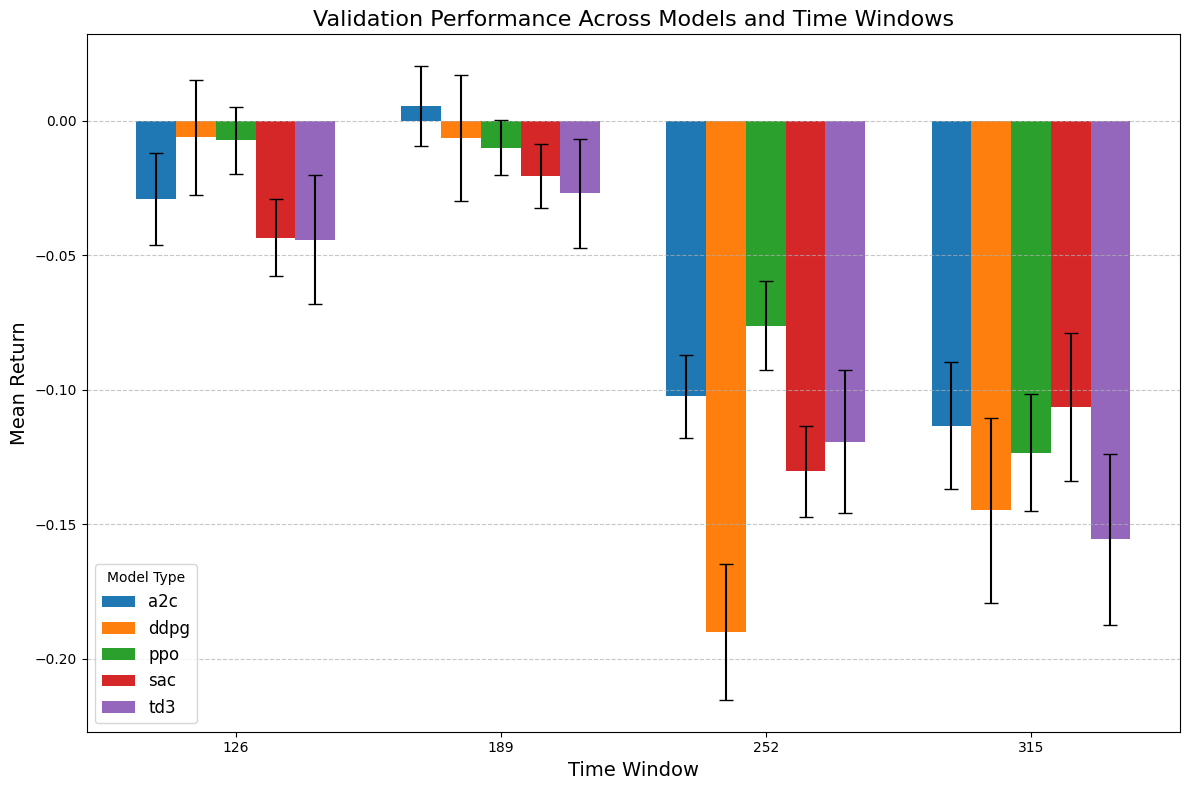

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Assuming the DataFrame has the following columns: 'model_type', 'trial', 'time_window', 'return'

# Group by 'model_type' and 'time_window' to compute the mean and SEM
grouped = validation_performance_stats.groupby(['model_type', 'time_window']).agg(
    mean_return=('return', 'mean'),
    sem_return=('return', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Pivot the data to make it easier to plot with bar chart
pivot_table = grouped.pivot(index='time_window', columns='model_type', values='mean_return')
error_table = grouped.pivot(index='time_window', columns='model_type', values='sem_return')

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.15
time_windows = pivot_table.index
x = np.arange(len(time_windows))

# Plot bars for each model_type
for i, model in enumerate(pivot_table.columns):
    ax.bar(
        x + i * bar_width,
        pivot_table[model],
        bar_width,
        label=model,
        yerr=error_table[model],
        capsize=5,
    )

# Add labels, title, and legend
ax.set_xlabel("Time Window", fontsize=14)
ax.set_ylabel("Mean Return", fontsize=14)
ax.set_title("Validation Performance Across Models and Time Windows", fontsize=16)
ax.set_xticks(x + bar_width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(time_windows)
ax.legend(title="Model Type", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# individual model performance in training


In [13]:
import hashlib
from collections import defaultdict
run_reports = []

for hyperparam in hyperparams_list:
    for episode in [1,2,3,4,5,6,7,8,9,10]:
        for k, v in hyperparam.items():
            if 'model_kwargs' in k:
                model_type = k.split('_')[0].lower()
                trial = int(v['name'].split(':')[1])
                variant = v['name']
                hash_id = hyperparameterized_model_name(model_type, v)
                r = (list(pd.read_csv(f'results/account_value_train_{hash_id}_{variant}_{episode}.csv')['account_value'])[-1]/1000000) - 1
                run_reports.append(['training', model_type, trial, episode, r, hash_id, v])

training_performance_stats = pd.DataFrame(run_reports, columns=['mode', 'model_type', 'trial', 'episode', 'return','hash_id', 'config'])

training_performance_stats['config_str'] = [hashlib.md5(str({z for z in x.items() if z[0] != 'name'}).encode()).hexdigest()  for x in training_performance_stats['config']]

training_performance_stats.sort_values(['model_type', 'trial', 'episode'], ascending=[True, True, True], inplace=True)
#training_performance_stats.to_csv('individual_agent_training_performance.csv')

In [14]:
training_performance_stats = pd.read_csv("individual_agent_training_performance.csv")

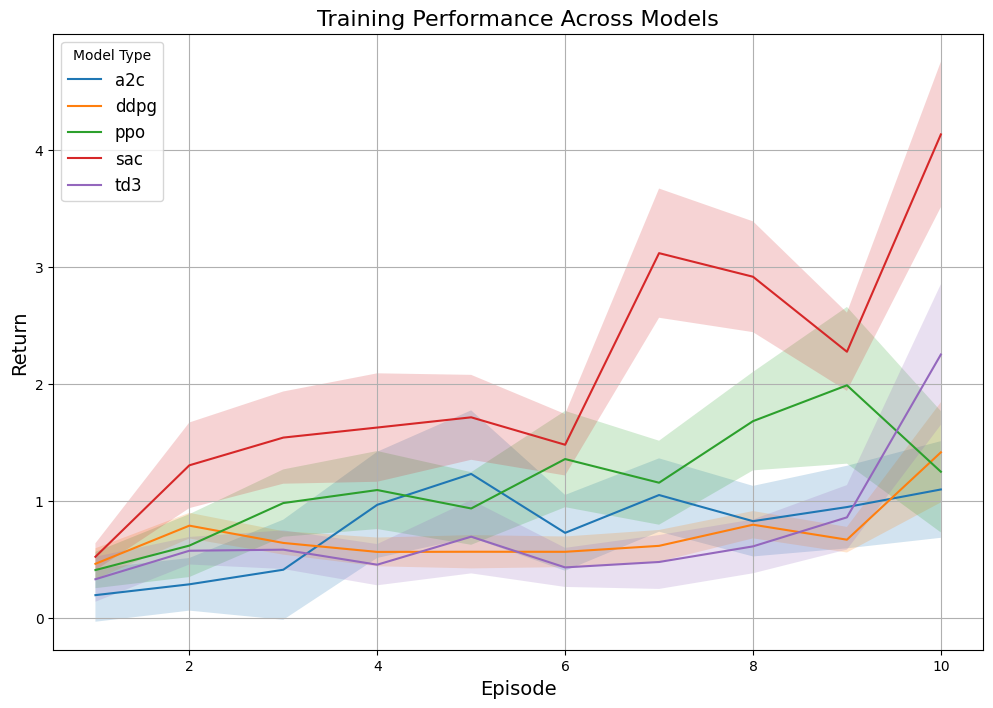

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the DataFrame has the following columns: 'model_type', 'trial', 'episode', 'return'

# Group by 'model_type' and 'episode' to compute the mean and SEM
grouped = training_performance_stats.groupby(['model_type', 'episode']).agg(
    mean_return=('return', 'mean'),
    sem_return=('return', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Create the plot
plt.figure(figsize=(12, 8))

# Iterate over each model_type and add its plot
model_types = grouped['model_type'].unique()

for model in model_types:
    # Filter data for the current model type
    model_data = grouped[grouped['model_type'] == model]

    # Plot the mean return with SEM confidence intervals
    plt.plot(model_data['episode'], model_data['mean_return'], label=model)
    plt.fill_between(
        model_data['episode'],
        model_data['mean_return'] - model_data['sem_return'],
        model_data['mean_return'] + model_data['sem_return'],
        alpha=0.2
    )

# Add titles, labels, and legend
plt.title("Training Performance Across Models", fontsize=16)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Return", fontsize=14)
plt.legend(title="Model Type", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [15]:
# 1. we trained 50 models using same set of hyperparameters, 10 for each type with name variant:1...variant_10
# 2. we get ensemble performance for 10 of those variants on the testing period (2 years), shown in the ensemble data


In [ ]:
# 3. we will train 10 stacking models and evaluate the performance over same testing period (2 years)


In [19]:
ray.shutdown()


In [16]:
# stacking agent
import ray
import random
import numpy as np
import torch

ray.init(ignore_reinit_error=True)

@ray.remote
def run_stacking_with_params(pretrained_model_zips, model_kwargs, seed, processed):

    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    rebalance_window = 63
    validation_window = 63
    timesteps_dict = {'model_6': 20000}

    state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension + 5 * stock_dimension
    env_kwargs = {
        "hmax": 1000,
        "initial_amount": 1000000,
        "buy_cost_pct": 0.001,
        "sell_cost_pct": 0.001,
        "state_space": state_space,
        "stock_dim": stock_dimension,
        "tech_indicator_list": INDICATORS,
        "action_space": stock_dimension,
        "reward_scaling": 1,
        "print_verbosity":100,
        "pretrained_model_configs": pretrained_model_zips
    }

    # Instantiate and run the stacking agent
    stacking_agent = DRLStackingAgent(
        df=processed,
        train_period=(TRAIN_START_DATE, TRAIN_END_DATE),
        val_test_period=(TEST_START_DATE, TEST_END_DATE),
        rebalance_window=rebalance_window,
        validation_window=validation_window,
        **env_kwargs
    )

    df_summary = stacking_agent.run_stack_strategy(
        model_kwargs, timesteps_dict
    )

    return df_summary

2024-12-04 10:17:14,556	INFO worker.py:1807 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [17]:
futures = []
stacking_params = []


for seed, key in enumerate(preconfig_models.keys()):
    shadow_index = 0.0000001*seed # to make sure the hash_id is not the same when we save


    model_kwargs = {
     'learning_rate': 0.001 + shadow_index,
     'batch_size': 128,
     'buffer_size': 100000,
     'tau': 0.01,
     'gamma': 0.98,
     'train_freq': 1,
     'ent_coef': 'auto',
     'name': f'variant:{int(seed+1)}'
     }


    stacking_params.append(model_kwargs)
    future = run_stacking_with_params.remote(
        preconfig_models[key],
        model_kwargs,
        seed,
        processed
    )
    futures.append(future)

results = ray.get(futures)
for df_summary in results:
    print(df_summary)

  Iter   Val Start     Val End Stacking Model Used
0  126  2021-10-04  2022-01-03             MODEL_6
1  189  2022-01-03  2022-04-04             MODEL_6
2  252  2022-04-04  2022-07-06             MODEL_6
3  315  2022-07-06  2022-10-04             MODEL_6
  Iter   Val Start     Val End Stacking Model Used
0  126  2021-10-04  2022-01-03             MODEL_6
1  189  2022-01-03  2022-04-04             MODEL_6
2  252  2022-04-04  2022-07-06             MODEL_6
3  315  2022-07-06  2022-10-04             MODEL_6
  Iter   Val Start     Val End Stacking Model Used
0  126  2021-10-04  2022-01-03             MODEL_6
1  189  2022-01-03  2022-04-04             MODEL_6
2  252  2022-04-04  2022-07-06             MODEL_6
3  315  2022-07-06  2022-10-04             MODEL_6
  Iter   Val Start     Val End Stacking Model Used
0  126  2021-10-04  2022-01-03             MODEL_6
1  189  2022-01-03  2022-04-04             MODEL_6
2  252  2022-04-04  2022-07-06             MODEL_6
3  315  2022-07-06  2022-10-04 

In [23]:
stacking_params

[{'learning_rate': 0.001,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:1'},
 {'learning_rate': 0.0010001,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:2'},
 {'learning_rate': 0.0010002,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:3'},
 {'learning_rate': 0.0010003,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:4'},
 {'learning_rate': 0.0010004,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef': 'auto',
  'name': 'variant:5'},
 {'learning_rate': 0.0010005,
  'batch_size': 128,
  'buffer_size': 100000,
  'tau': 0.01,
  'gamma': 0.98,
  'train_freq': 1,
  'ent_coef'

In [125]:
import hashlib
from collections import defaultdict
run_reports = []
preconfig_models = defaultdict(lambda: [])
for time_window in [126, 189, 252, 315]:
    for hyperparam in stacking_params:
        model_type = 'model_6'
        trial = int(hyperparam['name'].split(':')[1])

        hash_id = hyperparameterized_model_name(model_type, hyperparam)
        if time_window == 126:
            preconfig_models[trial].append({'model_path': f'trained_model/{hash_id}_30k_126',
                                            'model_type': model_type})
        r = (list(pd.read_csv(f'results/account_value_validation_{hash_id}_{time_window}.csv')['account_value'])[-1]/1000000) - 1
        model_zip = f'trained_model/{hash_id}_20k_{time_window}.zip'
        run_reports.append(['validation', model_type, trial, time_window, r,  hash_id, hyperparam, model_zip])

stacking_validation_performance_stats = pd.DataFrame(run_reports, columns=['mode', 'model_type', 'trial', 'time_window', 'return','hash_id', 'config', 'model_zip'])

stacking_validation_performance_stats['config_str'] = [hashlib.md5(str({z for z in x.items() if z[0] != 'name'}).encode()).hexdigest()  for x in stacking_validation_performance_stats['config']]
stacking_validation_performance_stats.sort_values(['model_type','time_window', 'trial'], ascending=[True, True, True], inplace=True)
stacking_validation_performance_stats.to_csv('stacking_agent_validation_performance.csv')


In [126]:
stacking_validation_performance_stats = pd.read_csv("stacking_agent_validation_performance.csv")

,mode,model_type,trial,time_window,return,hash_id,config,model_zip,config_str
0,validation,model_6,1,126,-0.004766,06db287dcf07f0b6863c92b1385ffe32,"{'learning_rate': 0.001, 'batch_size': 128, 'b...",trained_model/06db287dcf07f0b6863c92b1385ffe32...,41e9befa126e447fc6e6e633f0db2aed
1,validation,model_6,2,126,0.004984,0f1b906927365bd08b8946a33c855328,"{'learning_rate': 0.0010001, 'batch_size': 128...",trained_model/0f1b906927365bd08b8946a33c855328...,ead679f35d803cbeb5bb5a781358e3f5
2,validation,model_6,3,126,-0.100585,a083f2f11daacec12531d8935983e77c,"{'learning_rate': 0.0010002, 'batch_size': 128...",trained_model/a083f2f11daacec12531d8935983e77c...,c5abcdfe259f45da504ddf89e16a9425
3,validation,model_6,4,126,0.028660,8b799e324ac87d62bd81e3162cfdd840,"{'learning_rate': 0.0010003, 'batch_size': 128...",trained_model/8b799e324ac87d62bd81e3162cfdd840...,5faba013d815c06d8cf4b9f41813c5fa
4,validation,model_6,5,126,0.010501,7b9a9fe021a49a5bd3f70bb734b277dd,"{'learning_rate': 0.0010004, 'batch_size': 128...",trained_model/7b9a9fe021a49a5bd3f70bb734b277dd...,96024e29dfc12629efceee59fd811c3e
5,validation,model_6,6,126,0.022062,81c57244c5a5b3ca9515296fc7353f79,"{'learning_rate': 0.0010005, 'batch_size': 128...",trained_model/81c57244c5a5b3ca9515296fc7353f79...,79918ed095e559ca4d5cbcb9d56abbc0
6,validation,model_6,7,126,-0.033606,72ce3bfb2c477565fb8588e948ebee22,"{'learning_rate': 0.0010006, 'batch_size': 128...",trained_model/72ce3bfb2c477565fb8588e948ebee22...,c3caf0b3d37b8bd6dfa418ad673d05da
7,validation,model_6,8,126,0.023175,6ba698cbdab75c9efef7cca1fcdf937c,"{'learning_rate': 0.0010007, 'batch_size': 128...",trained_model/6ba698cbdab75c9efef7cca1fcdf937c...,d8f0a12032515401f647898bf9e28dbb
8,validation,model_6,9,126,-0.031415,878c2544a5c64713bab019bb5fa9c3d0,"{'learning_rate': 0.0010008, 'batch_size': 128...",trained_model/878c2544a5c64713bab019bb5fa9c3d0...,4c37f2e7429a3ffaa030d8ac7b225cf0
9,validation,model_6,10,126,-0.027443,d10ea13db72a716d8c7b203f1b597100,"{'learning_rate': 0.0010009, 'batch_size': 128...",trained_model/d10ea13db72a716d8c7b203f1b597100...,b4ac8863166dbed1266e7823faf1a480


<h2> Plotting Trade 2022-2023 Performance </h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_baseline(start_date, end_date):
    portfolio_data = processed.copy()
    portfolio_data['date'] = pd.to_datetime(portfolio_data['date'])
    initial_investment = 1_000_000
    commission_rate = 0.001  # 0.1% commission
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filter data for the date range
    portfolio_data = portfolio_data[
        (portfolio_data['date'] >= start_date) & (portfolio_data['date'] <= end_date)
    ].sort_values(['tic', 'date'])

    # Initialize variables
    tics = portfolio_data['tic'].unique()
    cash_available = initial_investment  # Start with the full investment amount
    shares_held = {tic: 0 for tic in tics}  # Track accumulated shares for each stock
    portfolio_data['shares_held'] = 0
    portfolio_data['cash_available'] = 0

    # Simulate daily purchases
    for date in portfolio_data['date'].unique():
        daily_data = portfolio_data[portfolio_data['date'] == date]
        for tic in daily_data['tic']:
            row = portfolio_data[(portfolio_data['date'] == date) & (portfolio_data['tic'] == tic)]
            close_price = row['close'].values[0]

            # Calculate how many shares we can afford with the available cash
            funds_available = cash_available / len(tics)  # Divide remaining cash evenly across tics
            shares_to_buy = funds_available / close_price  # Shares we can afford

            # Apply the 1000 shares per day cap
            shares_bought_today = min(shares_to_buy, 1000)

            # Deduct funds used for buying (including commission)
            funds_used = shares_bought_today * close_price * (1 + commission_rate)
            if funds_used > cash_available:  # Stop buying if insufficient funds
                shares_bought_today = 0
                funds_used = 0

            cash_available -= funds_used  # Update remaining cash
            shares_held[tic] += shares_bought_today  # Accumulate shares held

            # Update portfolio_data
            portfolio_data.loc[
                (portfolio_data['date'] == date) & (portfolio_data['tic'] == tic), 'shares_held'
            ] = shares_held[tic]
            portfolio_data.loc[
                (portfolio_data['date'] == date) & (portfolio_data['tic'] == tic), 'cash_available'
            ] = cash_available

    # Calculate daily portfolio value
    portfolio_data['stock_value'] = portfolio_data['close'] * portfolio_data['shares_held']
    daily_account_values = portfolio_data.groupby('date').agg(
        stock_value=('stock_value', 'sum'),
        cash_available=('cash_available', 'min')  # Cash is the same for all stocks on a given day
    ).reset_index()

    daily_account_values['account_value'] = daily_account_values['stock_value'] + daily_account_values['cash_available']

    # Ensure `date` column exists for backtest_stats
    daily_account_values['date'] = pd.to_datetime(daily_account_values['date'])

    # Run backtest statistics
    perf_stats_all = backtest_stats(account_value=daily_account_values[['date', 'account_value']])
    perf_stats_all = pd.DataFrame(perf_stats_all)

    return perf_stats_all, daily_account_values
baseline_1,_= calculate_baseline('2021-10-04', '2022-01-03')
baseline_2,_ = calculate_baseline('2022-01-03', '2022-04-04')
baseline_3,_ = calculate_baseline('2022-04-04', '2022-07-06')
baseline_4,_ = calculate_baseline('2022-07-06', '2022-10-04')

baseline_trade, buynhold_trade = calculate_baseline('2022-01-03', '2023-01-03')


In [148]:
import hashlib
from collections import defaultdict
full_trade_results = []
for hyperparam in stacking_params:
    for time_window in [126, 189, 252, 315]:
        model_type = 'model_6'
        trial = int(hyperparam['name'].split(':')[1])
        hash_id = hyperparameterized_model_name(model_type, hyperparam)
        csv_data = pd.read_csv(f'results/account_value_trade_{hash_id}_{time_window}.csv')
        csv_data['model'] = 'stacking'
        csv_data['variant'] = trial
        full_trade_results.append(csv_data)

stacking_full_trade_results = pd.concat(full_trade_results)
full_trade_results = []
for hyperparam in hyperparams_list:
    for time_window in [126, 189, 252, 315]:
        for k, v in hyperparam.items():
            if 'model_kwargs' in k:
                model_type = k.split('_')[0].lower()
                trial = int(v['name'].split(':')[1])
                hash_id = hyperparameterized_model_name(model_type, v)
                try:
                    csv_data = pd.read_csv(f'results/account_value_trade_{hash_id}_{time_window}.csv')
                    csv_data['model'] = 'ensemble'
                    csv_data['variant'] = trial
                    full_trade_results.append(csv_data)
                except:
                    continue


ensemble_full_trade_results = pd.concat(full_trade_results)
all_full_trade_results = pd.concat([ensemble_full_trade_results, stacking_full_trade_results])


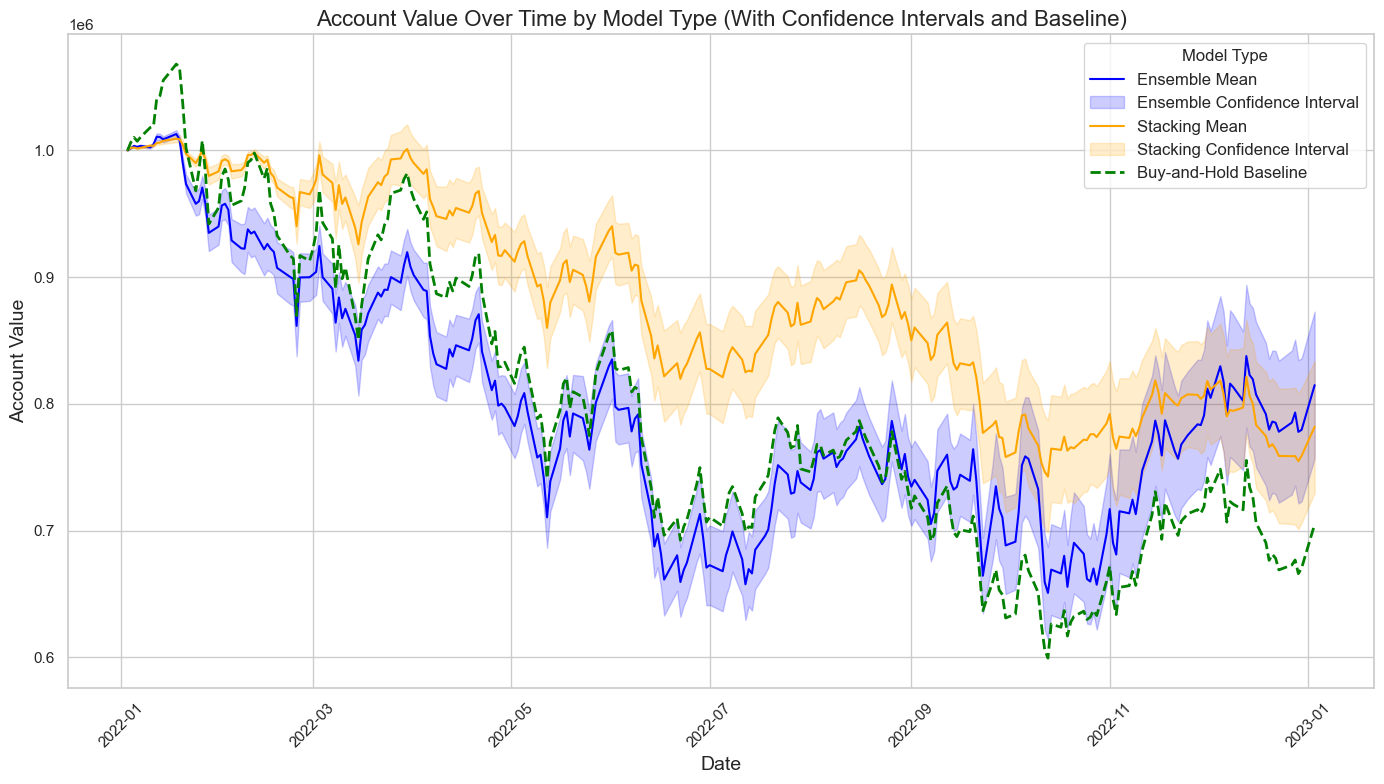

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named `all_full_trade_results` for ensemble/stacking and `buynhold_trade` for buy-and-hold

# Ensure the 'date' column in all DataFrames is in datetime format
all_full_trade_results['date'] = pd.to_datetime(all_full_trade_results['date'], errors='coerce')
buynhold_trade['date'] = pd.to_datetime(buynhold_trade['date'], errors='coerce')

# Drop rows with invalid dates
all_full_trade_results = all_full_trade_results.dropna(subset=['date'])
buynhold_trade = buynhold_trade.dropna(subset=['date'])

# Set the plot style
sns.set(style="whitegrid")

# Create a new column to categorize the model types for grouping
all_full_trade_results['model_type'] = all_full_trade_results['model']

# Group by date and model type to calculate the mean and confidence intervals
grouped = all_full_trade_results.groupby(['date', 'model_type'])['account_value'].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

# Calculate the standard error of the mean (SEM)
grouped['sem'] = grouped['std'] / grouped['count']**0.5

# Create the plot
plt.figure(figsize=(14, 8))

# Plot the mean and confidence interval for each model type
for model_type, color in zip(['ensemble', 'stacking'], ['blue', 'orange']):
    model_data = grouped[grouped['model_type'] == model_type]
    plt.plot(
        model_data['date'],
        model_data['mean'],
        label=f'{model_type.capitalize()} Mean',
        color=color
    )
    plt.fill_between(
        model_data['date'],
        model_data['mean'] - model_data['sem'],  # Lower bound of confidence interval
        model_data['mean'] + model_data['sem'],  # Upper bound of confidence interval
        color=color,
        alpha=0.2,
        label=f'{model_type.capitalize()} Confidence Interval'
    )

plt.plot(
    buynhold_trade['date'],
    buynhold_trade['account_value'],
    label="Buy-and-Hold Baseline",
    color="green",
    linestyle="--",
    linewidth=2
)

# Add labels, title, and legend
plt.title("Account Value Over Time by Model Type (With Confidence Intervals and Baseline)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Account Value", fontsize=14)
plt.legend(title="Model Type", fontsize=12, loc='best')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

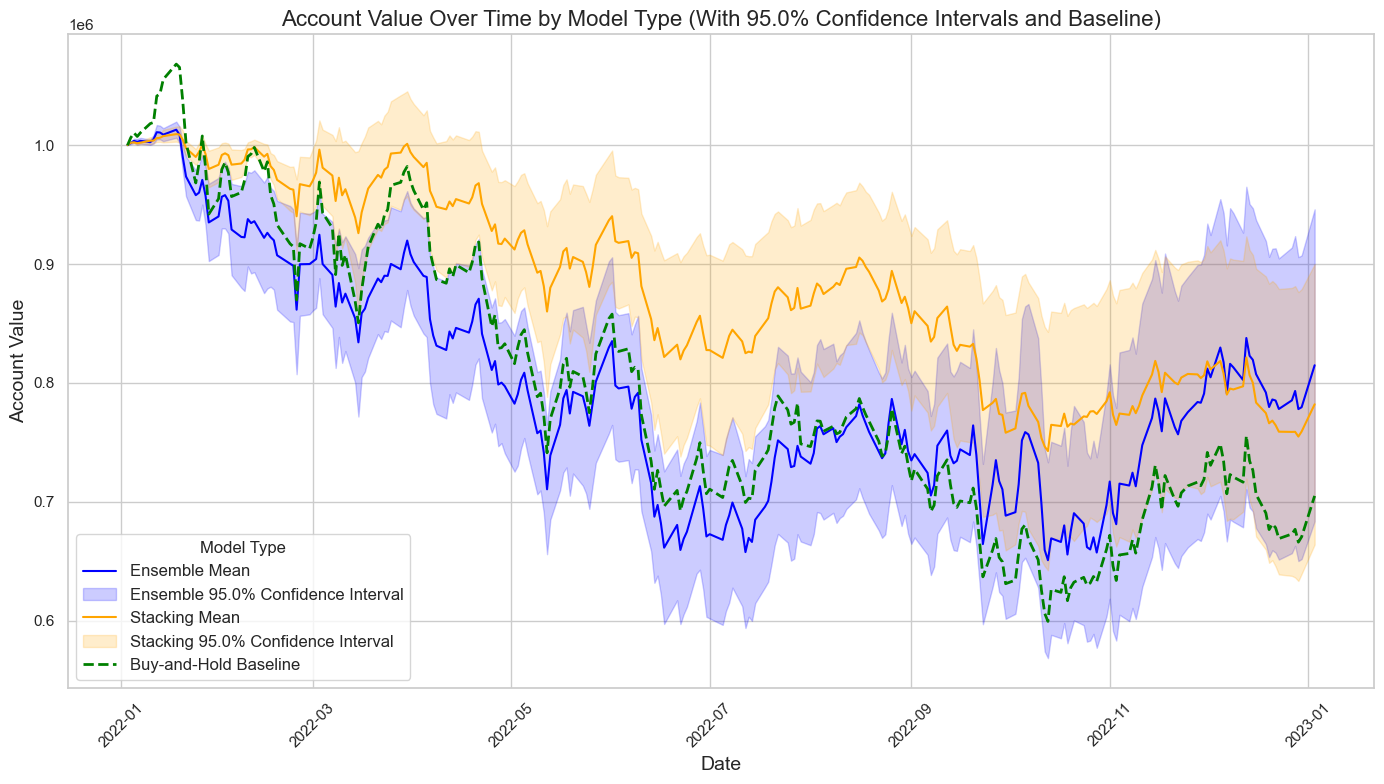

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Assuming your DataFrame is named `all_full_trade_results` for ensemble/stacking and `buynhold_trade` for buy-and-hold

# Ensure the 'date' column in all DataFrames is in datetime format
all_full_trade_results['date'] = pd.to_datetime(all_full_trade_results['date'], errors='coerce')
buynhold_trade['date'] = pd.to_datetime(buynhold_trade['date'], errors='coerce')

# Drop rows with invalid dates
all_full_trade_results = all_full_trade_results.dropna(subset=['date'])
buynhold_trade = buynhold_trade.dropna(subset=['date'])

# Set the plot style
sns.set(style="whitegrid")

# Create a new column to categorize the model types for grouping
all_full_trade_results['model_type'] = all_full_trade_results['model']

# Group by date and model type to calculate the mean and confidence intervals
grouped = all_full_trade_results.groupby(['date', 'model_type'])['account_value'].agg(
    mean='mean',
    std='std',
    count='count'
).reset_index()

# Calculate the standard error of the mean (SEM)
grouped['sem'] = grouped['std'] / grouped['count']**0.5

# Calculate the degrees of freedom
grouped['df'] = grouped['count'] - 1

# Handle cases where df <= 0
grouped = grouped[grouped['df'] > 0]

# Calculate the t-critical value for 95% confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
grouped['t_critical'] = grouped['df'].apply(lambda df: stats.t.ppf(1 - alpha/2, df))

# Calculate the margin of error
grouped['ME'] = grouped['t_critical'] * grouped['sem']

# Calculate the confidence intervals
grouped['lower'] = grouped['mean'] - grouped['ME']
grouped['upper'] = grouped['mean'] + grouped['ME']

# Create the plot
plt.figure(figsize=(14, 8))

# Plot the mean and confidence interval for each model type
for model_type, color in zip(['ensemble', 'stacking'], ['blue', 'orange']):
    model_data = grouped[grouped['model_type'] == model_type]
    plt.plot(
        model_data['date'],
        model_data['mean'],
        label=f'{model_type.capitalize()} Mean',
        color=color
    )
    plt.fill_between(
        model_data['date'],
        model_data['lower'],  # Lower bound of confidence interval
        model_data['upper'],  # Upper bound of confidence interval
        color=color,
        alpha=0.2,
        label=f'{model_type.capitalize()} {confidence_level*100}% Confidence Interval'
    )

plt.plot(
    buynhold_trade['date'],
    buynhold_trade['account_value'],
    label="Buy-and-Hold Baseline",
    color="green",
    linestyle="--",
    linewidth=2
)

# Add labels, title, and legend
plt.title(f"Account Value Over Time by Model Type (With {confidence_level*100}% Confidence Intervals and Baseline)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Account Value", fontsize=14)
plt.legend(title="Model Type", fontsize=12, loc='best')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

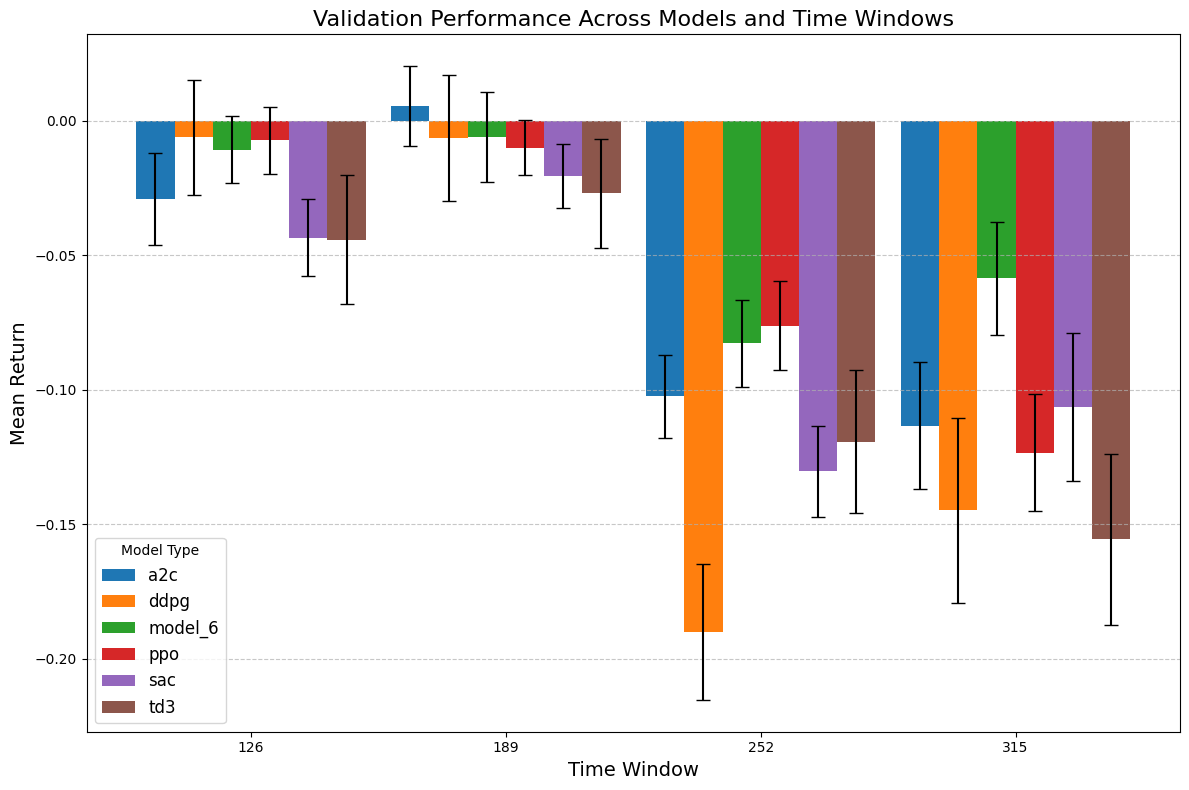

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Assuming the DataFrame has the following columns: 'model_type', 'trial', 'time_window', 'return'
stacking_validation_performance_stats = pd.read_csv('stacking_agent_validation_performance.csv')
all_validation_performance_stats = pd.concat([stacking_validation_performance_stats, validation_performance_stats])
# Group by 'model_type' and 'time_window' to compute the mean and SEM
grouped = all_validation_performance_stats.groupby(['model_type', 'time_window']).agg(
    mean_return=('return', 'mean'),
    sem_return=('return', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Pivot the data to make it easier to plot with bar chart
pivot_table = grouped.pivot(index='time_window', columns='model_type', values='mean_return')
error_table = grouped.pivot(index='time_window', columns='model_type', values='sem_return')

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.15
time_windows = pivot_table.index
x = np.arange(len(time_windows))

# Plot bars for each model_type
for i, model in enumerate(pivot_table.columns):
    ax.bar(
        x + i * bar_width,
        pivot_table[model],
        bar_width,
        label=model,
        yerr=error_table[model],
        capsize=5,
    )

# Add labels, title, and legend
ax.set_xlabel("Time Window", fontsize=14)
ax.set_ylabel("Mean Return", fontsize=14)
ax.set_title("Validation Performance Across Models and Time Windows", fontsize=16)
ax.set_xticks(x + bar_width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(time_windows)
ax.legend(title="Model Type", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

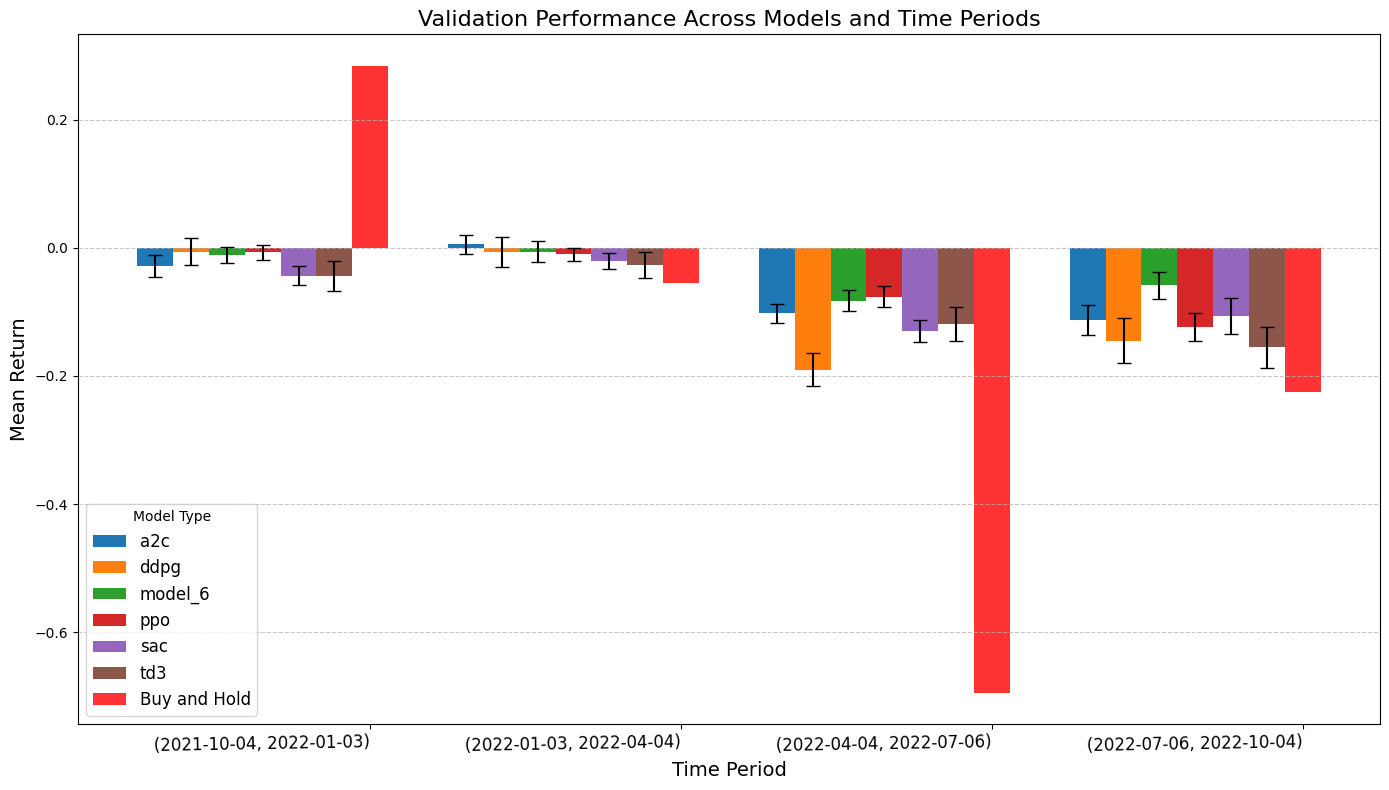

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Assuming the DataFrame has the following columns: 'model_type', 'trial', 'time_window', 'return'
stacking_validation_performance_stats = pd.read_csv('stacking_agent_validation_performance.csv')
all_validation_performance_stats = pd.concat([stacking_validation_performance_stats, validation_performance_stats])

# Group by 'model_type' and 'time_window' to compute the mean and SEM
grouped = all_validation_performance_stats.groupby(['model_type', 'time_window']).agg(
    mean_return=('return', 'mean'),
    sem_return=('return', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Pivot the data to make it easier to plot with bar chart
pivot_table = grouped.pivot(index='time_window', columns='model_type', values='mean_return')
error_table = grouped.pivot(index='time_window', columns='model_type', values='sem_return')

# Define baseline values for the time windows
baseline_values = [
    baseline_1.to_dict()[0]['Annual return'],
    baseline_2.to_dict()[0]['Annual return'],
    baseline_3.to_dict()[0]['Annual return'],
    baseline_4.to_dict()[0]['Annual return']
]

# Add the baseline data to the pivot table for easier plotting
pivot_table['Baseline'] = baseline_values


# Define bar width and spacing between groups
bar_width = 0.12  # Bars within the same group touch but do not overlap
group_spacing = 0.2  # Gap between different time windows

# Define time window labels
time_window_labels = [
    '(2021-10-04, 2022-01-03)',
    '(2022-01-03, 2022-04-04)',
    '(2022-04-04, 2022-07-06)',
    '(2022-07-06, 2022-10-04)'
]

x = np.arange(len(time_window_labels)) * (len(pivot_table.columns) * bar_width + group_spacing)

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each model_type, including baseline
for i, model in enumerate(pivot_table.columns):
    ax.bar(
        x + i * bar_width,  # Bars for each model are side by side
        pivot_table[model],
        bar_width,
        label=model if model != "Baseline" else "Buy and Hold",
        yerr=error_table[model] if model != "Baseline" else None,  # No error bars for baseline
        capsize=5 if model != "Baseline" else None,
        color='red' if model == "Baseline" else None,  # Use red for baseline bars
        alpha=0.8 if model == "Baseline" else 1.0
    )

ax.set_xticks(x + (len(pivot_table.columns) - 1) * bar_width)
ax.set_xticklabels(time_window_labels, rotation=1, ha='right', fontsize=12)  # Rotate labels for better readability

ax.set_xlabel("Time Period", fontsize=14)
ax.set_ylabel("Mean Return", fontsize=14)
ax.set_title("Validation Performance Across Models and Time Periods", fontsize=16)
ax.legend(title="Model Type", fontsize=12, loc='best')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [62]:
import hashlib
from collections import defaultdict
run_reports = []

for hyperparam in stacking_params:
    for episode in [1,2,3,4,5,6]:
        model_type = 'model_6'
        trial = int(hyperparam['name'].split(':')[1])
        variant = hyperparam['name']
        hash_id = hyperparameterized_model_name(model_type, hyperparam)
        r = (list(pd.read_csv(f'results/account_value_train_{hash_id}_{variant}_{episode}.csv')['account_value'])[-1]/1000000) - 1
        run_reports.append(['training', model_type, trial, episode, r, hash_id, hyperparam])

stacking_training_performance_stats = pd.DataFrame(run_reports, columns=['mode', 'model_type', 'trial', 'episode', 'return','hash_id', 'config'])

stacking_training_performance_stats['config_str'] = [hashlib.md5(str({z for z in x.items() if z[0] != 'name'}).encode()).hexdigest()  for x in stacking_training_performance_stats['config']]

stacking_training_performance_stats.sort_values(['model_type', 'trial', 'episode'], ascending=[True, True, True], inplace=True)
stacking_training_performance_stats.to_csv('stacking_agent_training_performance.csv')

stacking_training_performance_stats = pd.read_csv("stacking_agent_training_performance.csv")
all_training_performance_stats = pd.concat([stacking_training_performance_stats, training_performance_stats])

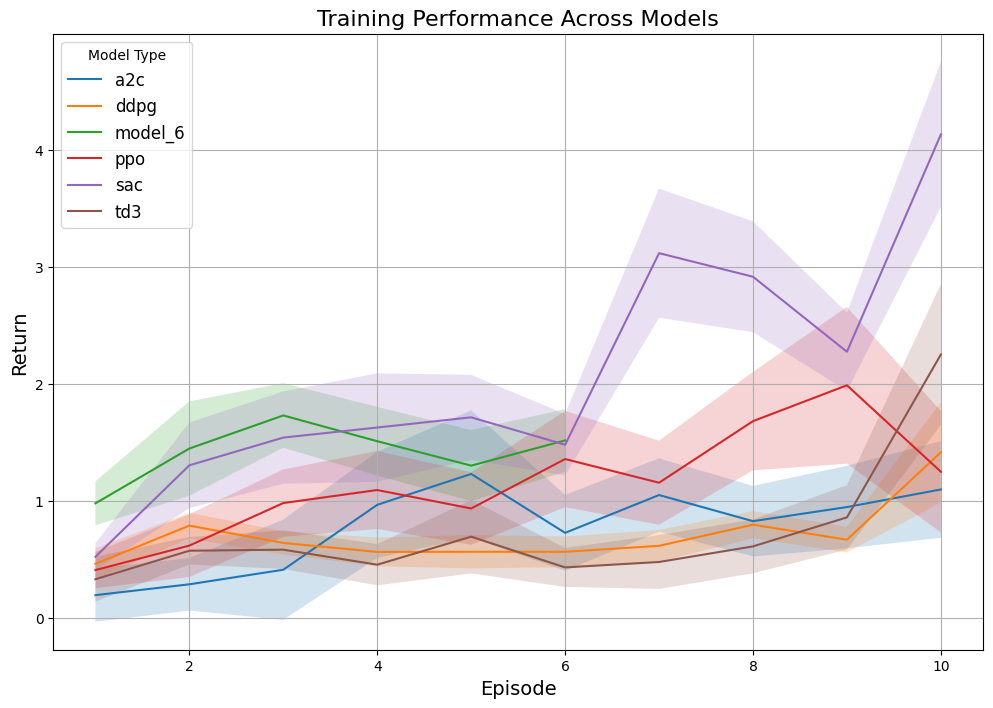

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the DataFrame has the following columns: 'model_type', 'trial', 'episode', 'return'

# Group by 'model_type' and 'episode' to compute the mean and SEM
grouped = all_training_performance_stats.groupby(['model_type', 'episode']).agg(
    mean_return=('return', 'mean'),
    sem_return=('return', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

# Create the plot
plt.figure(figsize=(12, 8))

# Iterate over each model_type and add its plot
model_types = grouped['model_type'].unique()

for model in model_types:
    # Filter data for the current model type
    model_data = grouped[grouped['model_type'] == model]

    # Plot the mean return with SEM confidence intervals
    plt.plot(model_data['episode'], model_data['mean_return'], label=model)
    plt.fill_between(
        model_data['episode'],
        model_data['mean_return'] - model_data['sem_return'],
        model_data['mean_return'] + model_data['sem_return'],
        alpha=0.2
    )

# Add titles, labels, and legend
plt.title("Training Performance Across Models", fontsize=16)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Return", fontsize=14)
plt.legend(title="Model Type", fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [127]:
stacking_validation_performance_stats
validation_performance_stats

,Unnamed: 0,mode,model_type,trial,time_window,return,hash_id,config,model_zip,config_str
0,0,validation,a2c,1,126,0.039201,78c00cddbd6d8095ff804528fcb63201,"{'learning_rate': 0.0007, 'n_steps': 10, 'gamm...",trained_model/78c00cddbd6d8095ff804528fcb63201...,7ae0e72cd58992cefbeabf93079e446d
1,5,validation,a2c,2,126,0.016407,3958c0bd3a3781323d9e4d5b42b8a902,"{'learning_rate': 0.0007, 'n_steps': 10, 'gamm...",trained_model/3958c0bd3a3781323d9e4d5b42b8a902...,7ae0e72cd58992cefbeabf93079e446d
2,10,validation,a2c,3,126,0.013937,f365b0cef236517b16f514ac3343c13d,"{'learning_rate': 0.0007, 'n_steps': 10, 'gamm...",trained_model/f365b0cef236517b16f514ac3343c13d...,7ae0e72cd58992cefbeabf93079e446d
3,15,validation,a2c,4,126,-0.025428,2467d51f4effa0847e01a481a7db2d18,"{'learning_rate': 0.0007, 'n_steps': 10, 'gamm...",trained_model/2467d51f4effa0847e01a481a7db2d18...,7ae0e72cd58992cefbeabf93079e446d
4,20,validation,a2c,5,126,-0.148535,4f50826161486e5b62ff987e7f3fa7fd,"{'learning_rate': 0.0007, 'n_steps': 10, 'gamm...",trained_model/4f50826161486e5b62ff987e7f3fa7fd...,7ae0e72cd58992cefbeabf93079e446d
...,...,...,...,...,...,...,...,...,...,...
195,179,validation,td3,6,315,-0.000638,bcd81258996becc190052565f496bf0c,"{'learning_rate': 0.001, 'batch_size': 128, 'b...",trained_model/bcd81258996becc190052565f496bf0c...,0e4c879d131ce4d6d30632cf922cc6ae
196,184,validation,td3,7,315,-0.249708,27b9b1dec1daa56b081f5c5b4bafbb59,"{'learning_rate': 0.001, 'batch_size': 128, 'b...",trained_model/27b9b1dec1daa56b081f5c5b4bafbb59...,0e4c879d131ce4d6d30632cf922cc6ae
197,189,validation,td3,8,315,-0.254063,960d8ca1a777da62f3784a985e41e8a5,"{'learning_rate': 0.001, 'batch_size': 128, 'b...",trained_model/960d8ca1a777da62f3784a985e41e8a5...,0e4c879d131ce4d6d30632cf922cc6ae
198,194,validation,td3,9,315,-0.196290,b19308116fd91c095ea212fb5e389b04,"{'learning_rate': 0.001, 'batch_size': 128, 'b...",trained_model/b19308116fd91c095ea212fb5e389b04...,0e4c879d131ce4d6d30632cf922cc6ae


In [128]:
stacking_validation_performance_stats

,mode,model_type,trial,time_window,return,hash_id,config,model_zip,config_str
0,validation,model_6,1,126,-0.004766,06db287dcf07f0b6863c92b1385ffe32,"{'learning_rate': 0.001, 'batch_size': 128, 'b...",trained_model/06db287dcf07f0b6863c92b1385ffe32...,41e9befa126e447fc6e6e633f0db2aed
1,validation,model_6,2,126,0.004984,0f1b906927365bd08b8946a33c855328,"{'learning_rate': 0.0010001, 'batch_size': 128...",trained_model/0f1b906927365bd08b8946a33c855328...,ead679f35d803cbeb5bb5a781358e3f5
2,validation,model_6,3,126,-0.100585,a083f2f11daacec12531d8935983e77c,"{'learning_rate': 0.0010002, 'batch_size': 128...",trained_model/a083f2f11daacec12531d8935983e77c...,c5abcdfe259f45da504ddf89e16a9425
3,validation,model_6,4,126,0.028660,8b799e324ac87d62bd81e3162cfdd840,"{'learning_rate': 0.0010003, 'batch_size': 128...",trained_model/8b799e324ac87d62bd81e3162cfdd840...,5faba013d815c06d8cf4b9f41813c5fa
4,validation,model_6,5,126,0.010501,7b9a9fe021a49a5bd3f70bb734b277dd,"{'learning_rate': 0.0010004, 'batch_size': 128...",trained_model/7b9a9fe021a49a5bd3f70bb734b277dd...,96024e29dfc12629efceee59fd811c3e
5,validation,model_6,6,126,0.022062,81c57244c5a5b3ca9515296fc7353f79,"{'learning_rate': 0.0010005, 'batch_size': 128...",trained_model/81c57244c5a5b3ca9515296fc7353f79...,79918ed095e559ca4d5cbcb9d56abbc0
6,validation,model_6,7,126,-0.033606,72ce3bfb2c477565fb8588e948ebee22,"{'learning_rate': 0.0010006, 'batch_size': 128...",trained_model/72ce3bfb2c477565fb8588e948ebee22...,c3caf0b3d37b8bd6dfa418ad673d05da
7,validation,model_6,8,126,0.023175,6ba698cbdab75c9efef7cca1fcdf937c,"{'learning_rate': 0.0010007, 'batch_size': 128...",trained_model/6ba698cbdab75c9efef7cca1fcdf937c...,d8f0a12032515401f647898bf9e28dbb
8,validation,model_6,9,126,-0.031415,878c2544a5c64713bab019bb5fa9c3d0,"{'learning_rate': 0.0010008, 'batch_size': 128...",trained_model/878c2544a5c64713bab019bb5fa9c3d0...,4c37f2e7429a3ffaa030d8ac7b225cf0
9,validation,model_6,10,126,-0.027443,d10ea13db72a716d8c7b203f1b597100,"{'learning_rate': 0.0010009, 'batch_size': 128...",trained_model/d10ea13db72a716d8c7b203f1b597100...,b4ac8863166dbed1266e7823faf1a480


In [107]:
test = data_split(
                processed,
                start='2023-01-01',
                end='2024-10-01'
            )

In [108]:
from stable_baselines3.common.vec_env import VecNormalize, DummyVecEnv

test_env = VecNormalize(DummyVecEnv(
            [
                lambda: StockTradingEnv(
                    df=test,
                    stock_dim=4,
                    hmax=1000,
                    initial_amount=1000000,
                    num_stock_shares=[0] * 4,
                    buy_cost_pct=[0.001] * 4,
                    sell_cost_pct=[0.001] * 4,
                    reward_scaling=1,
                    state_space=state_space,
                    action_space=4,
                    tech_indicator_list=INDICATORS,
                    turbulence_threshold=100000,
                    initial=True,
                    previous_state=[],
                    model_name='test',
                    mode="trade",
                    iteration=0,
                    print_verbosity=1,
                    model_file_suffix='robustness'
                )
            ]
        ), norm_obs=True, norm_reward=True)

In [133]:
def backtest(model_name, environment, cwd, deterministic=True):
    model = MODELS[model_name].load(cwd)
    state = environment.reset()
    episode_total_assets = [environment.initial_amount]
    episode_returns = []

    done = False
    while not done:
        action = model.predict(state, deterministic=deterministic)[0]
        state, reward, done, _ = environment.step(action)
        total_asset = (
                environment.amount
                + (environment.price_ary[environment.day] * environment.stocks).sum()
        )
        episode_total_assets.append(total_asset)
        episode_return = total_asset / environment.initial_amount

    episode_returns.append(episode_return)
    print("episode_return", episode_return)
    print("Test Finished!")
    return episode_total_assets

In [134]:
backtest('a2c', test_env, 'trained_model/78c00cddbd6d8095ff804528fcb63201_30k_126.zip', deterministic=True)

AttributeError: 'DummyVecEnv' object has no attribute 'initial_amount'

In [138]:
test_env.observation_space

Box(-inf, inf, (29,), float32)

In [ ]:
test_env